<a href="https://colab.research.google.com/github/Apmaranca/Tasdat/blob/main/Lorenz_con_impuestos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

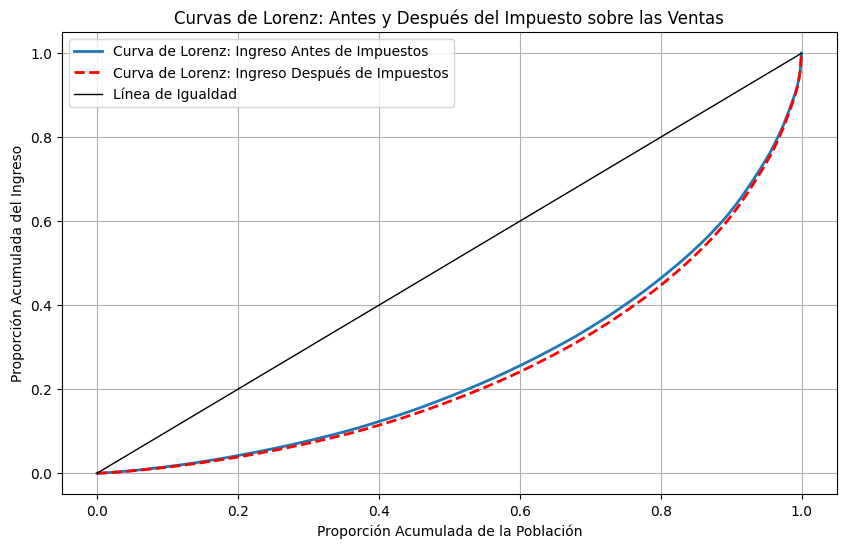

ModuleNotFoundError: No module named 'ace_tools'

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Generate Synthetic Income Data
np.random.seed(42)
n = 500
income = np.sort(np.random.lognormal(mean=3, sigma=0.9, size=n))

tax_rate = 0.15  # 15% sales tax

# Step 2: Define Engel Curve - Different Parameters for Income Classes
percentiles = np.percentile(income, [20, 40, 60, 80])
income_classes = np.digitize(income, bins=percentiles)

# Adjusted Engel curve parameters (ensuring full consumption at lower incomes)
params = {
    0: {'alpha': 1.00, 'beta': 1.00},  # Poorest consume 100% of income
    1: {'alpha': 0.95, 'beta': 0.98},
    2: {'alpha': 0.90, 'beta': 0.95},
    3: {'alpha': 0.80, 'beta': 0.90},
    4: {'alpha': 0.60, 'beta': 0.85}   # Higher savings in richest class
}

# Compute consumption using Engel curves for each income class
consumption = np.zeros_like(income)
for i in range(5):
    idx = (income_classes == i)
    alpha_i, beta_i = params[i]['alpha'], params[i]['beta']
    consumption[idx] = alpha_i * income[idx] ** beta_i

# Step 3: Compute Post-Tax Income
post_tax_income = income - tax_rate * consumption

# Step 4: Lorenz Curve Function
def lorenz_curve(values):
    sorted_vals = np.sort(values)
    cumulative_vals = np.cumsum(sorted_vals)
    cumulative_vals = np.insert(cumulative_vals, 0, 0)  # Ensure it starts at (0,0)
    return cumulative_vals / cumulative_vals[-1]

# Compute Lorenz curves for pre-tax and post-tax income
lorenz_pre_tax = lorenz_curve(income)
lorenz_post_tax = lorenz_curve(post_tax_income)
population_share = np.linspace(0, 1, len(lorenz_pre_tax))

# Step 5: Gini Index Function
def gini(array):
    """Compute the Gini coefficient of a distribution."""
    sorted_array = np.sort(array)
    n = len(array)
    cumulative_values = np.cumsum(sorted_array)
    cumulative_share = cumulative_values / cumulative_values[-1]
    B = np.trapz(cumulative_share, dx=1/n)
    return 1 - 2 * B

# Compute Gini coefficients
gini_pre_tax = gini(income)
gini_post_tax = gini(post_tax_income)
gini_difference = gini_post_tax - gini_pre_tax

# Step 6: Plot Lorenz Curves
plt.figure(figsize=(10, 6))
plt.plot(population_share, lorenz_pre_tax, label='Curva de Lorenz: Ingreso Antes de Impuestos', linewidth=2)
plt.plot(population_share, lorenz_post_tax, linestyle='--', label='Curva de Lorenz: Ingreso Después de Impuestos', linewidth=2, color='red')
plt.plot([0, 1], [0, 1], linestyle='-', color='black', linewidth=1, label='Línea de Igualdad')

plt.title('Curvas de Lorenz: Antes y Después del Impuesto sobre las Ventas')
plt.xlabel('Proporción Acumulada de la Población')
plt.ylabel('Proporción Acumulada del Ingreso')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Display Gini Results
gini_results_es = pd.DataFrame({
    "Índice de Gini Antes de Impuestos": [gini_pre_tax],
    "Índice de Gini Después de Impuestos": [gini_post_tax],
    "Aumento debido al impuesto": [gini_difference]
})

import ace_tools as tools
tools.display_dataframe_to_user("Análisis del Coeficiente de Gini", gini_results_es)
